In [1]:
#import the libraries we used
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\asus\AppData\Local\Temp\ipykernel_14332\2151917237.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [8]:
#make an array for the mean counts, half variance, and exp time
exp_time_g0 = [1,2,3,4,5,6,9,12,20,25,30,40,45,50,55,60]
mean_count_g0 = []
#extract the mean counts from flat frames for selected region
for i, n in enumerate(exp_time_g0):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-1.tiff", plugin="tifffile")
        mean_flat = np.mean(flatawal[110:250,110:250])
        mean_count_g0.append(mean_flat)
variance_flat_g0 = []
#extract the half variance of substracted flat frames
for i, n in enumerate(exp_time_g0):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-1.tiff", plugin="tifffile")
        flatakhir = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-2.tiff", plugin="tifffile")
        substract_flat = (np.array(flatawal[110:250,110:250], dtype=float)) - (np.array(flatakhir[110:250,110:250], dtype=float))
        var_flat = (np.var(np.abs(substract_flat))) *0.5
        variance_flat_g0.append(var_flat)
#make a dataframe for the data to plot
data = {'exp time': exp_time_g0, 'mean counts': mean_count_g0, 'half variance': variance_flat_g0}
df_g0 = pd.DataFrame(data)
df_g0

,exp time,mean counts,half variance
0,1,101.539337,3.566348
1,2,104.351122,4.231331
2,3,106.984337,4.739586
3,4,109.264235,5.357874
4,5,111.871173,6.055704
5,6,114.431888,6.739633
6,9,123.146531,8.504479
7,12,131.999337,10.155313
8,20,154.295459,15.206626
9,25,167.718776,18.867949


In [9]:
#make an array for the mean counts, half variance, and exp time
exp_time_g2 = [1,2,3,4,5,6,9,12,20,25,30,35,40,45,50]
mean_count_g2 = []
#extract the mean counts from flat frames for selected region
for i, n in enumerate(exp_time_g2):
    for z in range(1):
        flatawal2 = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-1.tiff", plugin="tifffile")
        mean_flat2 = np.mean(flatawal2[110:250,110:250])
        mean_count_g2.append(mean_flat2)
variance_flat_g2 = []
#extract the half variance of substracted flat frames
for i, n in enumerate(exp_time_g2):
    for z in range(1):
        flatawal2 = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-1.tiff", plugin="tifffile")
        flatakhir2 = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-2.tiff", plugin="tifffile")
        substract_flat2 = (np.array(flatawal2[110:250,110:250], dtype=float)) - (np.array(flatakhir2[110:250,110:250], dtype=float))
        var_flat2 = (np.var(np.abs(substract_flat2))) *0.5
        variance_flat_g2.append(var_flat2)
data2 = {'exp time': exp_time_g2, 'mean counts': mean_count_g2, 'half variance': variance_flat_g2}
df_g2 = pd.DataFrame(data2)
df_g2

,exp time,mean counts,half variance
0,1,102.297959,13.769796
1,2,105.678571,18.170320
2,3,108.708929,26.465212
3,4,111.936122,28.483332
4,5,114.900357,27.836314
5,6,118.450000,27.133848
6,9,129.597296,30.467723
7,12,140.292347,31.809712
8,20,167.884082,42.620651
9,25,184.302857,45.821554


In [23]:
#calculate the SNR with the equation from Mullikin et al.
a_g0 = df_g0['mean counts']**2 / df_g0['half variance']
a_g2 = df_g2['mean counts']**2 / df_g2['half variance']
snr_g0 = 10 * np.log(a_g0)
snr_g2 = 10 * np.log(a_g2)

In [24]:
#Data Signal to Noise Ratio
data_snr = {'SNR gain 0': snr_g0, 'SNR gain 2': snr_g2}
df_snr = pd.DataFrame(data_snr)
df_snr

,SNR gain 0,SNR gain 2
0,79.693505,66.333020
1,78.530063,64.210148
2,77.894151,61.015167
3,77.089710,60.865377
4,76.336952,61.617892
5,75.719541,62.481999
6,74.861569,63.121960
7,74.475967,64.276852
8,73.560074,64.942086
9,73.071126,66.084061


In [25]:
x_g0 = df_g0['mean counts'].values.reshape(-1,1)
y_g0 = snr_g0.values.reshape(-1,1)
x_g2 = df_g2['mean counts'].values.reshape(-1,1)
y_g2 = snr_g2.values.reshape(-1,1)
#fit the data
from  sklearn.preprocessing  import  PolynomialFeatures 
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree =  2)  
#for the gain = 0
X_poly_g0 = poly_reg.fit_transform(x_g0) 
model = LinearRegression() 
model.fit(X_poly_g0, y_g0)
pl = model.predict(X_poly_g0)
#for the gain = 2
X_poly_g2 = poly_reg.fit_transform(x_g2) 
model.fit(X_poly_g2, y_g2)
pl2 = model.predict(X_poly_g2)

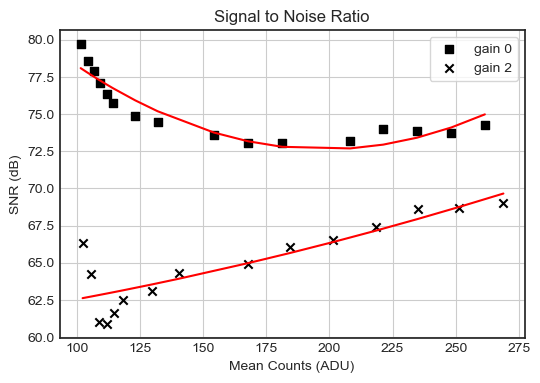

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_g0['mean counts'], snr_g0, c='k', marker='s', label='gain 0' )
ax.scatter(df_g2['mean counts'], snr_g2, c='k', marker='x', label = 'gain 2')
ax.plot(x_g0,pl,'r-')
ax.plot(x_g2,pl2,'r-')
ax.set(title='Signal to Noise Ratio', xlabel='Mean Counts (ADU)', ylabel='SNR (dB)')
ax.legend(frameon=True)
ax.grid()
plt.savefig("ALTS-Signal to noise ratio vs mean counts.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [27]:
x_g0 = df_g0['exp time'].values.reshape(-1,1)
y_g0 = snr_g0.values.reshape(-1,1)
x_g2 = df_g2['exp time'].values.reshape(-1,1)
y_g2 = snr_g2.values.reshape(-1,1)
#fit the data
from  sklearn.preprocessing  import  PolynomialFeatures 
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree =  2)  
#for the gain = 0
X_poly_g0 = poly_reg.fit_transform(x_g0) 
model = LinearRegression() 
model.fit(X_poly_g0, y_g0)
pl = model.predict(X_poly_g0)
#for the gain = 2
X_poly_g2 = poly_reg.fit_transform(x_g2) 
model.fit(X_poly_g2, y_g2)
pl2 = model.predict(X_poly_g2)

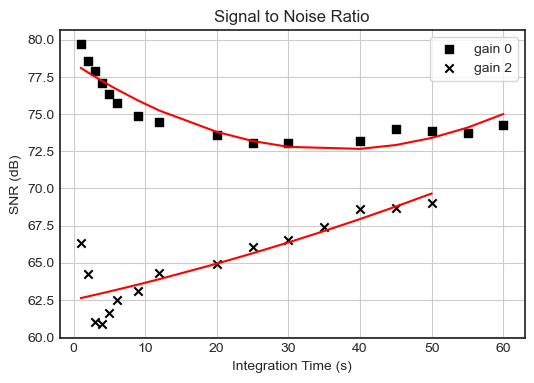

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_g0['exp time'], snr_g0, c='k', marker='s', label='gain 0' )
ax.scatter(df_g2['exp time'], snr_g2, c='k', marker='x', label = 'gain 2')
ax.plot(x_g0,pl,'r-')
ax.plot(x_g2,pl2,'r-')
ax.set(title='Signal to Noise Ratio', xlabel='Integration Time (s)', ylabel='SNR (dB)')
ax.legend(frameon=True)
ax.grid()
plt.savefig("ALTS-Signal to noise ratio vs exp time.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [31]:
xa = df_g0['mean counts'].values.reshape(-1,1)
ya = df_g0['half variance'].values.reshape(-1,1)
xb = df_g2['mean counts'].values.reshape(-1,1)
yb = df_g2['half variance'].values.reshape(-1,1)
model_1 = LinearRegression()
model_2 = LinearRegression()
model_1.fit(xa,ya)
model_2.fit(xb,yb)
y_prediksi = model_1.predict(xa)
y_prediksi_g2 = model_2.predict(xb)

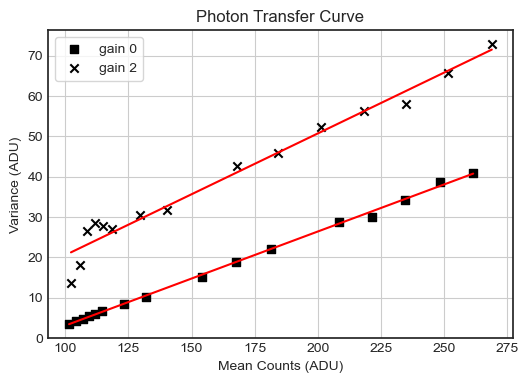

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_g0['mean counts'],df_g0['half variance'],c='k',marker='s', label="gain 0")
ax.scatter(df_g2['mean counts'],df_g2['half variance'],c='k', marker='x', label='gain 2')
ax.plot(xa,y_prediksi,'r-')
ax.plot(xb,y_prediksi_g2,'r-')
ax.set(title='Photon Transfer Curve', xlabel='Mean Counts (ADU)', ylabel='Variance (ADU)')
ax.legend(loc='best',frameon=True)
ax.grid()
plt.savefig("ALTS-Transfer Curve gain 0 and 2.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)